Bacha: pohlídat audioknihy.
Bacha 2: filtrovat posmrtně vydané knihy.

In [4]:
import os
import re
import statistics
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [6]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [7]:
sloupce = ['leader','245','080','655','072','100','041','964']

In [8]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [9]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194400459,[990129s1944 xr cze],nam a22 1 4500,[1],[0],[Syn plavce pískaře /],None,[Karel Hadrbolec],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Hadrbolec, Karel,]",[jk01032980],[aut],[1909-1986],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpg20162781226,[160301s1976 xr nnn kncze],nkm a22 7i 4500,[0],[0],[Mariánské Lázně :],[soubor 12 pohlednic /],[průvodní slovo Evžen Veselý],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[0],"[cze, rus, ger, eng, fre]",None,None,None,None,None,None,None,None,None,None,None,None,NaN
bk193201754,[990714s1931 xr cze],nam a22 1 4500,[1],[0],[První pokusy o kontrolu dědičnosti u nížinnéh...,None,[Ing. Dr. Stanislav Koláček ; Předložil Dr. J....,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Koláček, Stanislav,]",[jk01061198],[aut],[1902-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20203263455,[201120s2020 xr e 001 0bcze],nam a22 i 4500,[1],[0],[Milan Kundera :],[život spisovatele /],[Jean-Dominique Brierre ; přeložila Lucie Šavl...,None,None,None,None,None,None,"[821.162.3-051, 821.133.1-051, 929, (092)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[biografie, biography]","[fd131909, None]","[czenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3.09, 929]","[Česká literatura (o ní), Biografie]","[Konspekt, Konspekt]","[11, 8]",[1],"[Brierre, Jean-Dominique,]",[xx0161755],[aut],[1953-],None,None,None,None,[1],[cze],[fre],None,None,None,None,None,None,None,None,None,None,None,NaN
nkc20132440638,[130207s1877 xr e 000 0 cze],nam a22 a 4500,[1],[0],[O gotických stolicích v kostele sv. Barbory v...,None,"[dle přednášky presidenta Václ. Ot. Předáka, o...",None,None,None,None,None,None,"[726.6, 72/76.05, 72.04, 27-526.1/.6, 745.51.0...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,[7],[studie],[fd133597],[czenas],None,None,None,None,[7],[74],[Kresba. Umělecká řemesla],[Konspekt],[21],[1],"[Předák, Otakar Václav,]",[jo2013752618],[aut],[1822-1879],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk20020885954,[020920s2000 xr e 000 1 cze],cam a22 a 4500,[1],[0],[Čína můj osud /],None,[Nicole Monesová ; přeložila Alena Šmídová],None,None,None,None,None,None,[821.111(73)-31],[MRF],None,None,None,"[7, 9]","[americké romány, American fiction]","[fd131796, None]","[czenas, eczenas]",None,None,None,None,[7],[821.111(73)-3],[Americká próza],[Konspekt],[25],[1],"[Mones, Nicole]",[pna2008467078],[aut],None,None,None,None,None,[1],[cze],[eng],None,None,None,None,None,None,None,None,None,None,None,NaN
bk197500257,[970324s1974 xr ||| | cze],nam a22 1 4500,[0],[0],[Východiska a cíle :],[metodologické problémy sovětské literární věd...,"[výbor uspořádal, z ruských originálů přeložil...",None,None,None,None,None,None,[882.0(082)],[undef],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],[cze],[rus],None,None,None,None,None,None,None,None,None,None,None,[Věda literární sovětská - metodologie - sborn...
hud02900956,[081203s1934 xr sgz g nn cze],ncm a22 a 4500,[1],[0],[Dědictví],None,[[složil] F. Hvížďálek],None,None,[[hudebnina] /],None,None,None,"[78.03.011.26, 784.3/.7, 78.089.6.087.6]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[populární hudba, písně, vokální linky s podlo...","[fd992599, fd133162, fd201985]","[c

In [10]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1238228 entries, ck8300078 to nkc20243632953
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1238228 non-null  object
 1   leader    1238228 non-null  object
 2   245_ind1  1238217 non-null  object
 3   245_ind2  1238217 non-null  object
 4   245_a     1238228 non-null  object
 5   245_b     598792 non-null   object
 6   245_c     1022186 non-null  object
 7   245_n     76402 non-null    object
 8   245_p     58319 non-null    object
 9   245_h     149934 non-null   object
 10  245_f     18 non-null       object
 11  245_s     5 non-null        object
 12  245_v     1 non-null        object
 13  080_a     1017378 non-null  object
 14  080_2     1017378 non-null  object
 15  080_x     5 non-null        object
 16  080_9     1 non-null        object
 17  080_ind1  1 non-null        object
 18  655_ind2  883796 non-null   object
 19  655_a     883796 non-null   obje

In [11]:
df = df.explode('008')

In [12]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel /],None,[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,[1],[0],[Šikmý kostel :],[románová kronika ztraceného města /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel.],None,[Karin Lednická],"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],"[aut, nrt]",[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20223472496,221116s2022 xr g 000 f eng,nam a22 i 4500,[1],[4],[The leaning church :],[chronicle of a town that vanished: 1894-1921 /],[Karin Lednická ; English translation: Pavlína...,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,[1],[eng],[cze],None,None,None,None,None,None,None,None,None,None,None,NaN
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25

In [13]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [14]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1080979 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1080979 non-null  object
 1   leader    1080979 non-null  object
 2   245_ind1  1080976 non-null  object
 3   245_ind2  1080977 non-null  object
 4   245_a     1080979 non-null  object
 5   245_b     515211 non-null   object
 6   245_c     896702 non-null   object
 7   245_n     65612 non-null    object
 8   245_p     52724 non-null    object
 9   245_h     115250 non-null   object
 10  245_f     16 non-null       object
 11  245_s     4 non-null        object
 12  245_v     1 non-null        object
 13  080_a     898079 non-null   object
 14  080_2     898079 non-null   object
 15  080_x     5 non-null        object
 16  080_9     1 non-null        object
 17  080_ind1  1 non-null        object
 18  655_ind2  777138 non-null   object
 19  655_a     777138 non-null   obje

In [15]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpg20061690253,060921s2006 xr nnn g kncze,nkm a22 a 4500,[1],[0],[2007],[týdenní stolní kalendář žánrový /],"[foto Eduard Studnička, Jan Halady ; grafická ...",None,None,[[grafika] :],None,None,None,[(059)],[MRF],None,None,None,[7],[stolní kalendáře],[fd133595],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,[1],"[Studnička, Eduard,]",[jn20001005499],[pht],[1942-2022],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
np9539110,950424s1994 xr a u0|0 0 cze,nam a22 4500,[1],[0],[Potrubní systémy :],[Určeno pro posl. 5. roč. Fak. strojní /],[František Hradil],None,None,None,None,None,None,"[696, 621.6]","[undef, undef]",None,None,None,[7],[učebnice vysokých škol],[fd133772],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,[1],"[Hradil, František]",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[systémy potrubní - skripta vysokošk.]
cpg19970778709,970204s1995 xr cze,nkm a22 a 4500,[1],[0],[Budějovický Budvar],[pivo světové značky],None,None,None,[[grafika] :],None,None,None,"[663, 659]","[undef, undef]",None,None,None,[7],[obrazové plakáty],[fd247927],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk193804134,990424s1938 xr cze,nam a22 1 4500,[1],[0],[Rusky podle sovětských metod s označením příz...,[Učebnik russkogo jazyka dlja Čechov s oboznač...,[Pantelejmon Suchanov],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Suchanov, Pantelejmon,]",[jk01121692],[aut],[-1969],None,None,None,None,[0],"[cze, rus]",None,None,None,None,None,None,None,None,None,None,None,None,NaN
cpz20000980203,010514p20001988xr nnn j d z cze,nim a22 a 4500,[1],[0],[Lenka vypravuje pohádky z kytary],None,[[pohádky a písňové texty Zdeněk Rytíř ; hudba...,None,None,[[zvukový záznam] /],None,None,None,"[821.162.3-34, 784.67, 82-93]","[MRF, MRF, MRF]",None,None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Rytíř, Zdeněk,]",[jk01103428],"[aut, lyr]",[1944-2013],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
np9316497,940418s1993 xr u0|0 0 cze,nam a22 4500,[1],[0],[Umění lehce se učit :],"[nové metody, které vám ulehčí učení /]",[Kurt Tepperwein ; z něm. přel. Blanka Kubisková],None,None,None,None,None,None,"[37.091.3, 159.95, 159.98]","[undef, undef, undef]",None,None,None,[7],[příručky],[fd133209],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,[1],"[Tepperwein, Kurt,]",[xx0002198],[aut],[1932-],None,None,None,None,[1],[cze],[ger],None,None,None,None,None,None,None,None,None,None,None,[učení efektivní - příručky metodické]
nos190243028,000805s1910 xr cze,nam a22 1 4500,[1],[0],[Dějiny lékařství.],None,[Ondřej Schrutz],"[Seš. 1,]","[Starověk, až k Řekům /]",None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Schrutz, Ondřej,]",[jk01111121],[aut],[1865-1932],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk196400239,970905s1963 xr 001 | cze,nam a22 1 4500,[1],[0],[Učebnice hovorového jazyka japonského /],None,[Vlasta Hilská],None,None,None,None,None,None,[811.521(075)],[undef],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Hilská, Vlasta,]",[jk01041061],[aut],[1909-1968],None,None,None,None,[0],"[cze, jpn]",None,None,None,None,None,None,None,None,None,None,None,None,[Japonština hovorová - učebnice]
cpg20172866665,170105s

In [16]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel /],None,[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,[1],[0],[Šikmý kostel :],[románová kronika ztraceného města /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel.],None,[Karin Lednická],"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],"[aut, nrt]",[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],"[aut, nrt]",[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.explode("leader")

In [18]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [19]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 930735 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   008       930735 non-null  object
 1   leader    930735 non-null  object
 2   245_ind1  930734 non-null  object
 3   245_ind2  930735 non-null  object
 4   245_a     930735 non-null  object
 5   245_b     414357 non-null  object
 6   245_c     804544 non-null  object
 7   245_n     59495 non-null   object
 8   245_p     49293 non-null   object
 9   245_h     8581 non-null    object
 10  245_f     14 non-null      object
 11  245_s     4 non-null       object
 12  245_v     1 non-null       object
 13  080_a     750540 non-null  object
 14  080_2     750540 non-null  object
 15  080_x     1 non-null       object
 16  080_9     0 non-null       object
 17  080_ind1  1 non-null       object
 18  655_ind2  630724 non-null  object
 19  655_a     630724 non-null  object
 20  655_7     63031

In [20]:
df[df['245_a'].astype(str).str.contains('Šikmý kostel',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,[1],[0],[Šikmý kostel :],[románová kronika ztraceného města /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 930735 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   008       930735 non-null  object
 1   leader    930735 non-null  object
 2   245_ind1  930734 non-null  object
 3   245_ind2  930735 non-null  object
 4   245_a     930735 non-null  object
 5   245_b     414357 non-null  object
 6   245_c     804544 non-null  object
 7   245_n     59495 non-null   object
 8   245_p     49293 non-null   object
 9   245_h     8581 non-null    object
 10  245_f     14 non-null      object
 11  245_s     4 non-null       object
 12  245_v     1 non-null       object
 13  080_a     750540 non-null  object
 14  080_2     750540 non-null  object
 15  080_x     1 non-null       object
 16  080_9     0 non-null       object
 17  080_ind1  1 non-null       object
 18  655_ind2  630724 non-null  object
 19  655_a     630724 non-null  object
 20  655_7     63031

In [22]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [23]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 888140 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   008       888140 non-null  object
 1   leader    888140 non-null  object
 2   245_ind1  888140 non-null  object
 3   245_ind2  888140 non-null  object
 4   245_a     888140 non-null  object
 5   245_b     389468 non-null  object
 6   245_c     801985 non-null  object
 7   245_n     59171 non-null   object
 8   245_p     47818 non-null   object
 9   245_h     3438 non-null    object
 10  245_f     11 non-null      object
 11  245_s     2 non-null       object
 12  245_v     1 non-null       object
 13  080_a     709224 non-null  object
 14  080_2     709224 non-null  object
 15  080_x     1 non-null       object
 16  080_9     0 non-null       object
 17  080_ind1  1 non-null       object
 18  655_ind2  602326 non-null  object
 19  655_a     602326 non-null  object
 20  655_7     60193

In [24]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [25]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [26]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [27]:
df = df.dropna(subset=["rok"])

<Axes: xlabel='rok'>

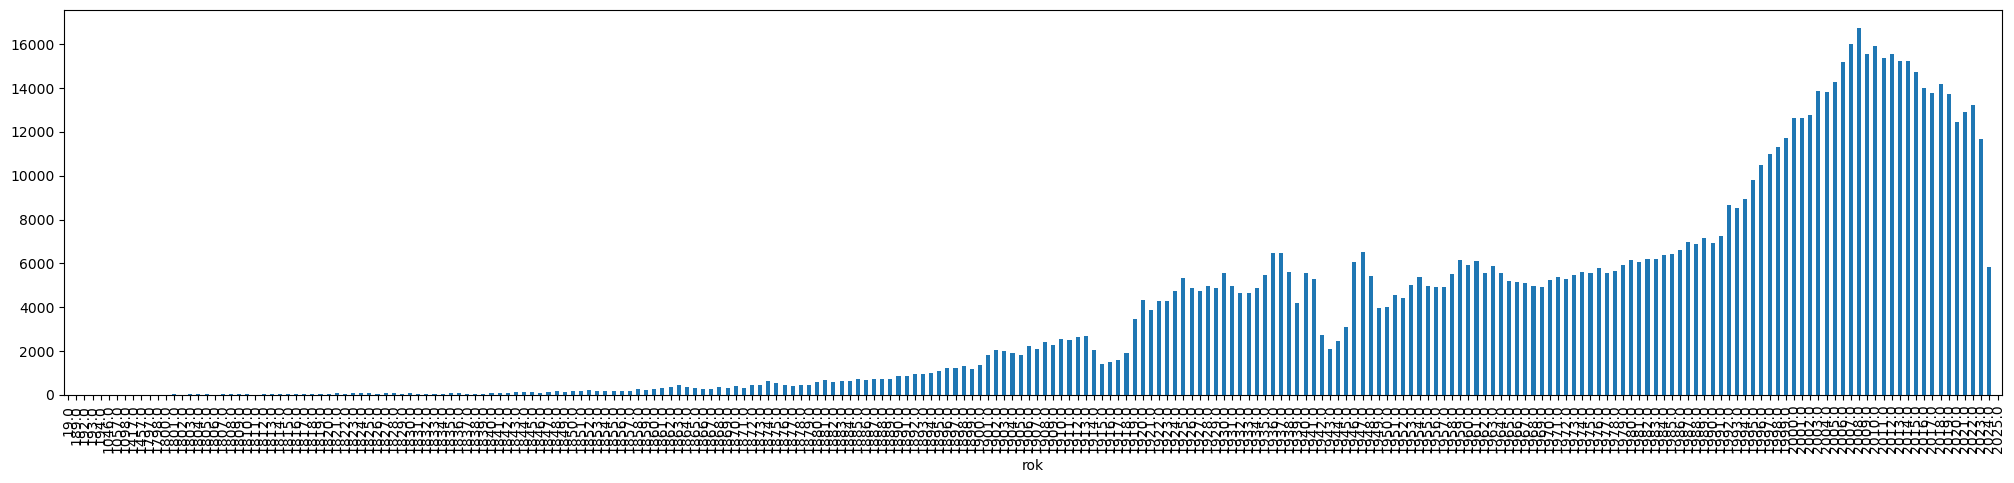

In [28]:
df.groupby("rok").size().plot.bar(figsize=(25,5))

In [29]:
df['245_a'].sample(50)

001
nkc20112160977           [Německý mluwnjk, aneb, Malá grammatyka :]
nkc20132508918                                    [Dopisy z cest /]
nkc20112165665                                 [Příběh legionáře :]
nkc20132440493                                   [Ostrovní básně /]
cpk19970281808                              [Petr Eben, Jeremias :]
nkc20203242795                          [Prasek v proměnách času /]
nkc20213325225     [Rozmanitost podpory učení v teorii a výzkumu :]
bk194700015                                      [Veselá abeceda /]
nkc20071703523           [Učebnice vědecké a tradiční astrologie :]
nkc20092012167                        [Jan Prokop Schaaffgotsche :]
bk194400107                                      [Velká myšlenka :]
cpk19980295438                            [Humanitas et "techné" :]
nos190152903                                  [Všeobecná botanika.]
nkc20152683025                                           [Odešel /]
cpk20132468890                        [Matka

In [30]:
df.sample(10)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20203239650,200723s2020 xr a c f 000 0 cze,nam a22 i 4500,[1],[0],[Chyba není konec světa /],None,"[Kimberly Feltes Taylor, Eric Braun ; ilustrac...",None,None,None,None,None,None,"[159.955, 159.923.2, 159.923.5, (0.062), (0.05...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[populárně-naučné publikace, publikace pro dět...","[fd131864, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[159.92, 0/9-053.2]",[Vývojová psychologie. Individuální psychologi...,"[Konspekt, Konspekt]","[17, 26]",[1],"[Feltes Taylor, Kimberly]",[xx0252149],[aut],None,None,None,None,None,[1],[cze],[eng],None,None,None,None,None,None,None,None,None,None,None,NaN,2020.0
bk192902409,991117s1928 xr a g 000 0 cze,nam a22 1 4500,[1],[0],[Zemské hlavní město Brno /],None,[sestavil Alois V. Kožíšek],None,None,None,None,None,None,"[711.4, (437.322), (082)]","[MRF, MRF, MRF]",None,None,None,[7],[sborníky],[fd163935],[czenas],None,None,None,None,[7],[71],[Územní plánování. Urbanismus. Památková péče],[Konspekt],[21],[1],"[Kožíšek, Alois Václav,]",[jk01062660],[com],[1886-1954],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928.0
nkc20213375967,211124s2021 xr ac e f 000 0 cze,nam a22 i 4500,[1],[0],[Cardano :],[je Cardano nejzajímavější síť budoucnosti? /],[Petr Kulhánek ; Patrick Tobler - rozhovor],None,None,None,None,None,None,"[336.74-021.131, 004.65, 658.114-051, (035), (...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[příručky, rozhovory, handbooks and manuals, i...","[fd133209, fd133303, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[336.7],[Finance],[Konspekt],[4],[1],"[Kulhánek, Petr,]",[ola20201081113],[aut],[1979-],None,None,None,None,[0],"[cze, eng]",None,None,None,None,None,None,None,None,None,None,None,None,NaN,2021.0
cpk19990734026,990909s1999 xr e 000 0 cze,nam a22 a 4500,[0],[0],"[Trh bydlení, jeho regionální diferenciace a s...",None,[Alena Nedomová (editorka) ... [et al.]],None,None,None,None,None,None,"[365, (048.8)]","[MRF, MRF]",None,None,None,[7],[studie],[fd133597],[czenas],None,None,None,None,[7],[365],[Požadavky na bydlení a jejich uspokojování],[Konspekt],[18],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[0],"[cze, eng]",None,[eng],None,None,None,None,None,None,None,None,None,None,NaN,1999.0
nkc20213327383,210608s2021 xr ae e 000 0 cze,nam a22 i 4500,[0],[0],[Historie šlovických domů /],None,[kolektiv autorů],None,None,None,None,None,None,"[728.6, 728.3, 332.814-057.65, 365-057.65, 94(...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[přehledy, surveys]","[fd133202, None]","[czenas, eczenas]",None,None,None,None,[7],[94(437)],[Dějiny Česka a Slovenska],[Konspekt],[8],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
bk196403887,971211s1964 xr a d | 000| 1 cze,nam a22 1 4500,[1],[0],[Songaré /],None,[L.M. Pařízek ; [jazyková spolupráce Karla Dos...,None,None,None,None,None,None,"[821.162.3-31, 821-93, (0:82-311.3)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[české romány, dobrodružné romány, publikace p...","[fd133974, fd132061, fd133157]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",[1],"[Pařízek, L. M.]",[jk01091804],[aut],[1907-1988],"[(Ladislav Mikeš),]",None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0
cpk20010999898,010614s2001 xr a a 000 m cze,nam a22 a 4500,[1],[0],"[Halí, be

In [31]:
df = df.dropna(subset=['245_a','100_a'])
df['titul'] = df['245_a'].apply(lambda x: x[0][:-1].strip() if x[0][-1] in [':','/',';','='] else x[0].strip())

## Kontroly divných věcí ze sešitu 112

In [33]:
df[df['245_a'].astype(str).str.contains('Malíř Láďa Rákos')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Finální export

In [35]:
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: ", ".join([y.replace(',','') for y in x]) if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7'].apply(lambda x: x[0] if x != None else None)
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

C:\Users\micha\AppData\Local\Temp\ipykernel_14964\1202386092.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


In [36]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
bk193001199,1930.0,Zarathuštra,Hofmeister Rudolf Richard,jk01041582
nkc20182997012,2018.0,Jedna věta,Zelenka Jaromír,jn19990210839
cpk20020891860,2002.0,Sny Eugena Brikciuse,Brikcius Eugen,jn19990218008
nkc20102157366,2010.0,Příběhy mojí babičky,Muchová-Daxnerová Zuzana,ola2011631398
nkc20183058293,2018.0,A co když je to láska?,Úžasná Olívie,ola20191019592
nkc20223416910,2022.0,ABeCeDa s nádivkou,Beneš Pavel,None
nkc20213350632,2021.0,Minutky,Jonešová Veronika,ola20191051658
cpk20041416349,1992.0,Tenkrát,Vítek Bohuslav,jo20191045865
nkc20081802235,1887.0,Zemanka,Jirásek Alois,jk01051816


<Axes: xlabel='rok'>

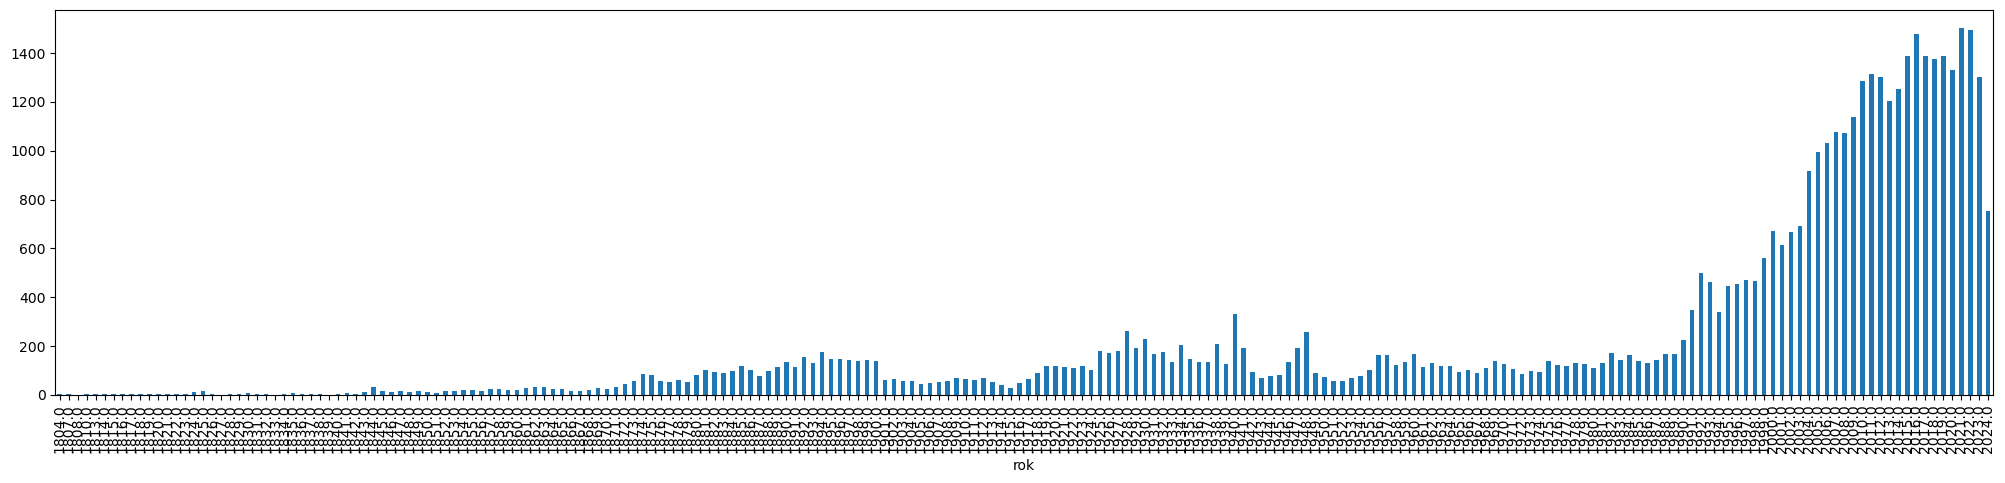

In [37]:
r(ceska_proza2)

In [38]:
ceska_proza2[ceska_proza2['rok'] == 1890].sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20071749619,070829s1890 xr j 000 m cze,nam a22 a 4500,[1],[0],[Zrnéčka :],[básničky pro mládež /],[sepsal Augustin Černý. Pověsti o městech a hr...,None,None,None,None,None,None,"[821-93, 821.162.3-1, 821.162.3-34, (0:82-1), ...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[česká poezie, české pověsti, publikace pro děti]","[fd133958, fd201456, fd133156]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3, 821-93]","[Česká literatura, Literatura pro děti a mláde...","[Konspekt, Konspekt]","[25, 26]",[1],"[Černý, Augustin,]",[jk01021508],[aut],[1853-1938],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Zrnéčka,Černý Augustin,jk01021508
nkc20092025961,091215s1890 xr e 000 j cze,nam a22 a 4500,[1],[0],[V zátiší :],[povídka z rakousko-pruské války /],[napsal Alois Dostál],None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Dostál, Alois,]",[jk01022773],[aut],[1858-1934],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,V zátiší,Dostál Alois,jk01022773
cpk20031288850,031020s1890 xr a b 000 j cze,nam a22 a 4500,[1],[0],[Poslední bobr u Soběslavě :],[povídka pro mládež /],[napsal Fr. Rud. Skočdopole],None,None,None,None,None,None,"[821-93, 821.162.3-32, (0:82-32)]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[české povídky, publikace pro mládež]","[fd133971, fd133157]","[czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",[1],"[Skočdopole, František Rudolf]",[jk01111546],[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Poslední bobr u Soběslavě,Skočdopole František Rudolf,jk01111546
bknmik10520,021210s1890 xr a 000 1 cze,nam a22 4500,[1],[0],[Z luhův a lesů :],"[prostonárodní pověsti, obrázky z přírodopisu ...",[sepsal Josef Soukal. Vyprávěnky dítkám / naps...,None,None,None,None,None,None,"[821-93, 821.162.3-1, 821.162.3-3, (0:82-1), (...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[česká poezie, české prózy, publikace pro děti]","[fd133958, fd133972, fd133156]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3, 821-93]","[Česká literatura, Literatura pro děti a mláde...","[Konspekt, Konspekt]","[25, 26]",[1],"[Soukal, Josef,]",[jk01120507],[aut],[1852-1928],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Z luhův a lesů,Soukal Josef,jk01120507
nkc20092025972,091215s1890 xr e 000 j cze,nam a22 a 4500,[1],[0],"[Husitské obrázky, čili, K čemu musí ubohý Hus...",None,[napsal Bohumil Brodský],None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Zahradník-Brodský, Bohumil,]",[jk01151969],[aut],[1862-1939],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,"Husitské obrázky, čili, K čemu musí ubohý Hus ...",Zahradník-Brodský Bohumil,jk01151969
bknmik04161,020311s1890 xr e ||| f cze,nam a22 1 4500,[1],[0],[Libuše v Americe /],None,[Naps. J.J. Kolar],None,None,None,None,None,None,"[821.162.3-31, (0:82-31)]","[MRF, MRF]",None,None,None,[7],[české romány],[fd133974],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Ko

In [39]:
len(ceska_proza2)

47419

In [40]:
ceska_proza2[ceska_proza2['autorstvo'] == 'Němcová Božena']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20122433977,121221m18451848xr g 000 f cze,nam a22 ia4500,[1],[0],[Národní báchorky a powěsti /],None,[od Boženy Němcowé],None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.0,Národní báchorky a powěsti,Němcová Božena,jk01083016
cpk20223420309,220509m18541855xr g 000 f cze,nam a22 ia4500,[1],[0],[Národní Báchorky a Pověsti od Boženy Němcové],None,None,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[české pověsti, české pohádky]","[fd201456, fd133970]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,Národní Báchorky a Pověsti od Boženy Němcové,Němcová Božena,jk01083016
bknhak08992,030516s1855 xr e 000 f cze,nam a22 a 4500,[1],[0],[Babička :],[obrazy venkovského života /],[od Boženy Němcové],None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855.0,Babička,Němcová Božena,jk01083016
cpk20132502523,131002s1856 xr 000 1 cze,nam a22 aa4500,[1],[0],[Pohorská vesnice :],[povídka ze života lidu venkovského /],[od Boženy Němcové],None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856.0,Pohorská vesnice,Němcová Božena,jk01083016
bknhak09084,030517m18571858xr e 000 1 cze,nam a22 1 4500,[1],[0],[Slovenské pohádky a pověsti.],None,[od Boženy Němcové],[Sv. I-X /],None,None,None,None,None,"[821.162.4-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[slovenské pohádky, slovenské pověsti]","[fd133448, fd219004]","[czenas, czenas]",None,None,None,None,[7],[821.162.4],[Slovenská literatura],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Slovenské pohádky a pověsti.,Němcová Božena,jk01083016
nkc20061643751,060220s1862 xr g 000 m cze,nam a22 a 4500,[1],[0],[Chýže pod horami :],[obrázek ze Slovenska ; O dvanácti měsíčkách :...,[od Boženy Němcové],None,None,None,None,None,None,"[821.162.3-32, 821.162.4-34]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, slovenské pohádky]","[fd133971, fd133448]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Chýže pod horami,Němcová Božena,jk01083016
cpk20132447922,130320s1862 xr e 000 j cze,nam a22 aa4500,[1],[0],[Drobné povídky /],None,[od Boženy Němcové],None,None,None,None,None,None,[821.162.3-32],[MRF],None,None,None,[7],[české povídky],[fd133

In [41]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_json(os.path.join("data","cnb_ceska_proza.json"), orient="index", indent=4)
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [98]:
ceska_proza2[ceska_proza2['rok'] == 2024].sort_values(by='008', key=lambda x: x.str[:6], ascending=False)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20243632920,240923s2024 xr a 000 1 cze,nam a22 i 4500,[1],[0],[Moje obří strašilka /],None,[napsala Jana Burešová ; ilustroval Jakub Dvořák],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Burešová, Jana]",[xx0223719],[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moje obří strašilka,Burešová Jana,xx0223719
nkc20243632045,240923s2024 xr g 000 f cze,nam a22 i 4500,[1],[0],[Ve výslužbě.],None,[Martin Goffa],None,"[Zmizelá, aneb, První poslední případ /]",None,None,None,None,"[821.162.3-31, (0:82-312.4)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, detektivní romány, Czech fictio...","[fd133974, fd132010, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Goffa, Martin,]",[xx0165664],[aut],[1973-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Ve výslužbě.,Goffa Martin,xx0165664
nkc20243632885,240923s2024 xr g 000 f cze,nam a22 i 4500,[1],[0],[Dvojsmyslná /],None,[Irová Marie],None,None,None,None,None,None,"[821.162.3-31, (0:82-31)-055.2]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, romány pro ženy, Czech fiction,...","[fd133974, fd187897, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Irová, Marie]",[xx0323069],[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Dvojsmyslná,Irová Marie,xx0323069
nkc20243632055,240923s2024 xr a 000 1 cze,nam a22 i 4500,[1],[0],[Lišákova dobrodružství /],None,[Iva Tomečková ; ilustrovala Tereza Křemínská],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Tomečková, Iva,]",[mzk2005318189],[aut],[1958-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Lišákova dobrodružství,Tomečková Iva,mzk2005318189
nkc20243606272,240919s2024 xr 000 1 cze,nam a22 i 4500,[1],[0],[Obyčejná laskavost ;],[Neobyčejná nestoudnost /],[Michal Viewegh],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Viewegh, Michal,]",[jn19990010021],[aut],[1962-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Obyčejná laskavost,Viewegh Michal,jn19990010021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233550172,230929s2024 xr g 000 j cze,nam a22 i 4500,[1],[0],[Moderní gigolo /],None,[Eloise],None,None,None,None,None,None,"[821.162.3-32, (0:82-321.5)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, humoristické příběhy, Czech st...","[fd133973, fd132430, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[0],"[Eloise,]",[xx0321951],[aut],[1972-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moderní gigolo,Eloise,xx0321951
nkc20233548538,230918s2024 xr a b 000 j cze,nam a22 i 4500,[1],[0],[Skřítkové z Adršpašských skal /],None,[Klára Končáková ; ilustrace Lucie Gajdošová],None,None,None,None,None,None,"[821.162.3-32, 821-93, (437.31-17), (0:82-32)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběh